In [11]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [12]:
#import data
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [13]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
data.shape

(5000, 14)

In [15]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [16]:
#checking nulls
data.isnull().values.any()#if there are any null values in data set

False

no null values

In [17]:
#identifying correlation in data
data.corr()#gives the correlation matrix

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [18]:
#correlation in graphical representation
def plot_cor(dt,size=11):
    corr = dt.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

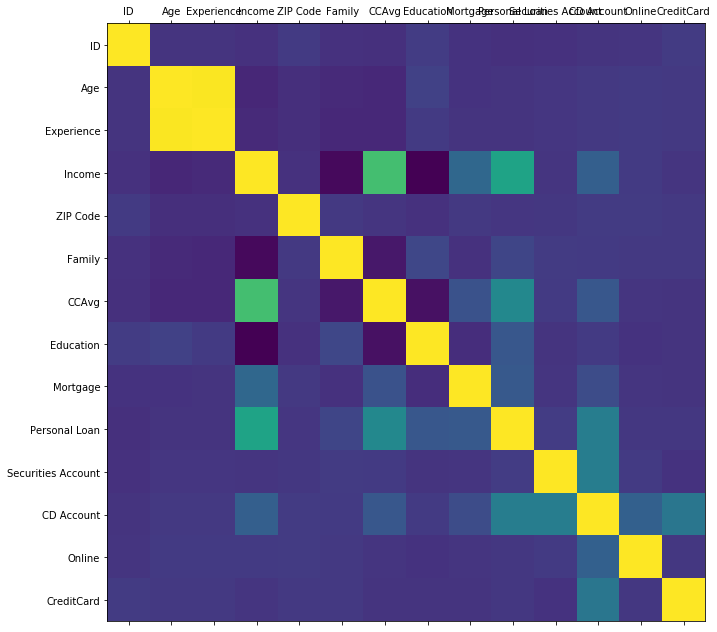

In [19]:
plot_cor(data)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.strong correlation between age and experince is noted

In [20]:
#changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
data[var]=data[var].astype('category')

In [21]:
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

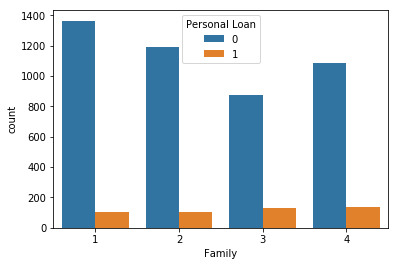

In [22]:
#Data Analysis
sns.countplot(x='Family',data=data,hue='Personal Loan')

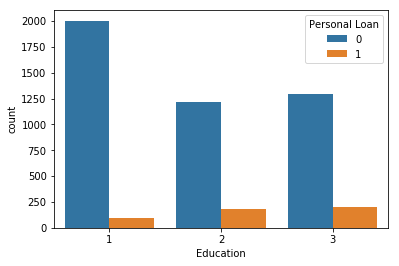

In [23]:
sns.countplot(x='Education',data=data,hue='Personal Loan')

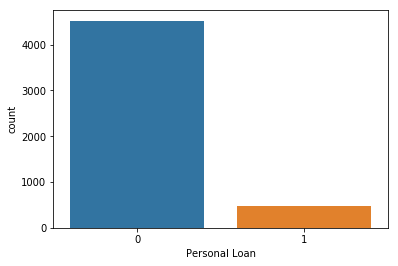

In [24]:
sns.countplot(x='Personal Loan',data=data)

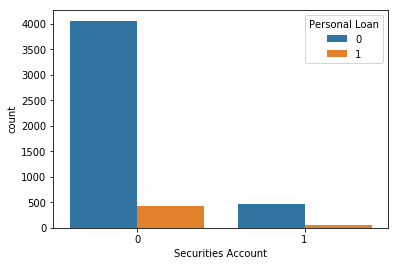

In [25]:
sns.countplot(x='Securities Account',data=data,hue='Personal Loan')

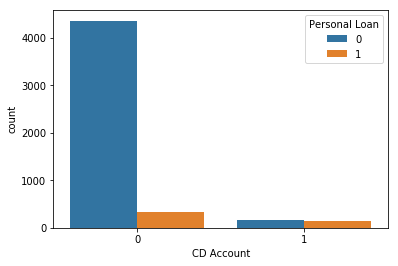

In [26]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

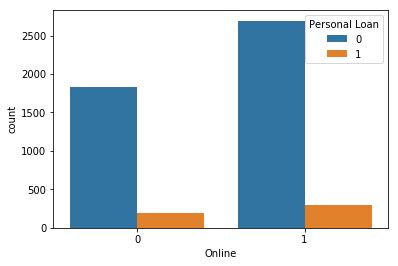

In [27]:
sns.countplot(x='Online',data=data,hue='Personal Loan')

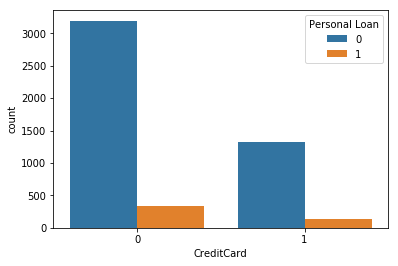

In [28]:
sns.countplot(x='CreditCard',data=data,hue='Personal Loan')

In [29]:
data=data.drop(['ID'],axis=1)

C:\Users\asus\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


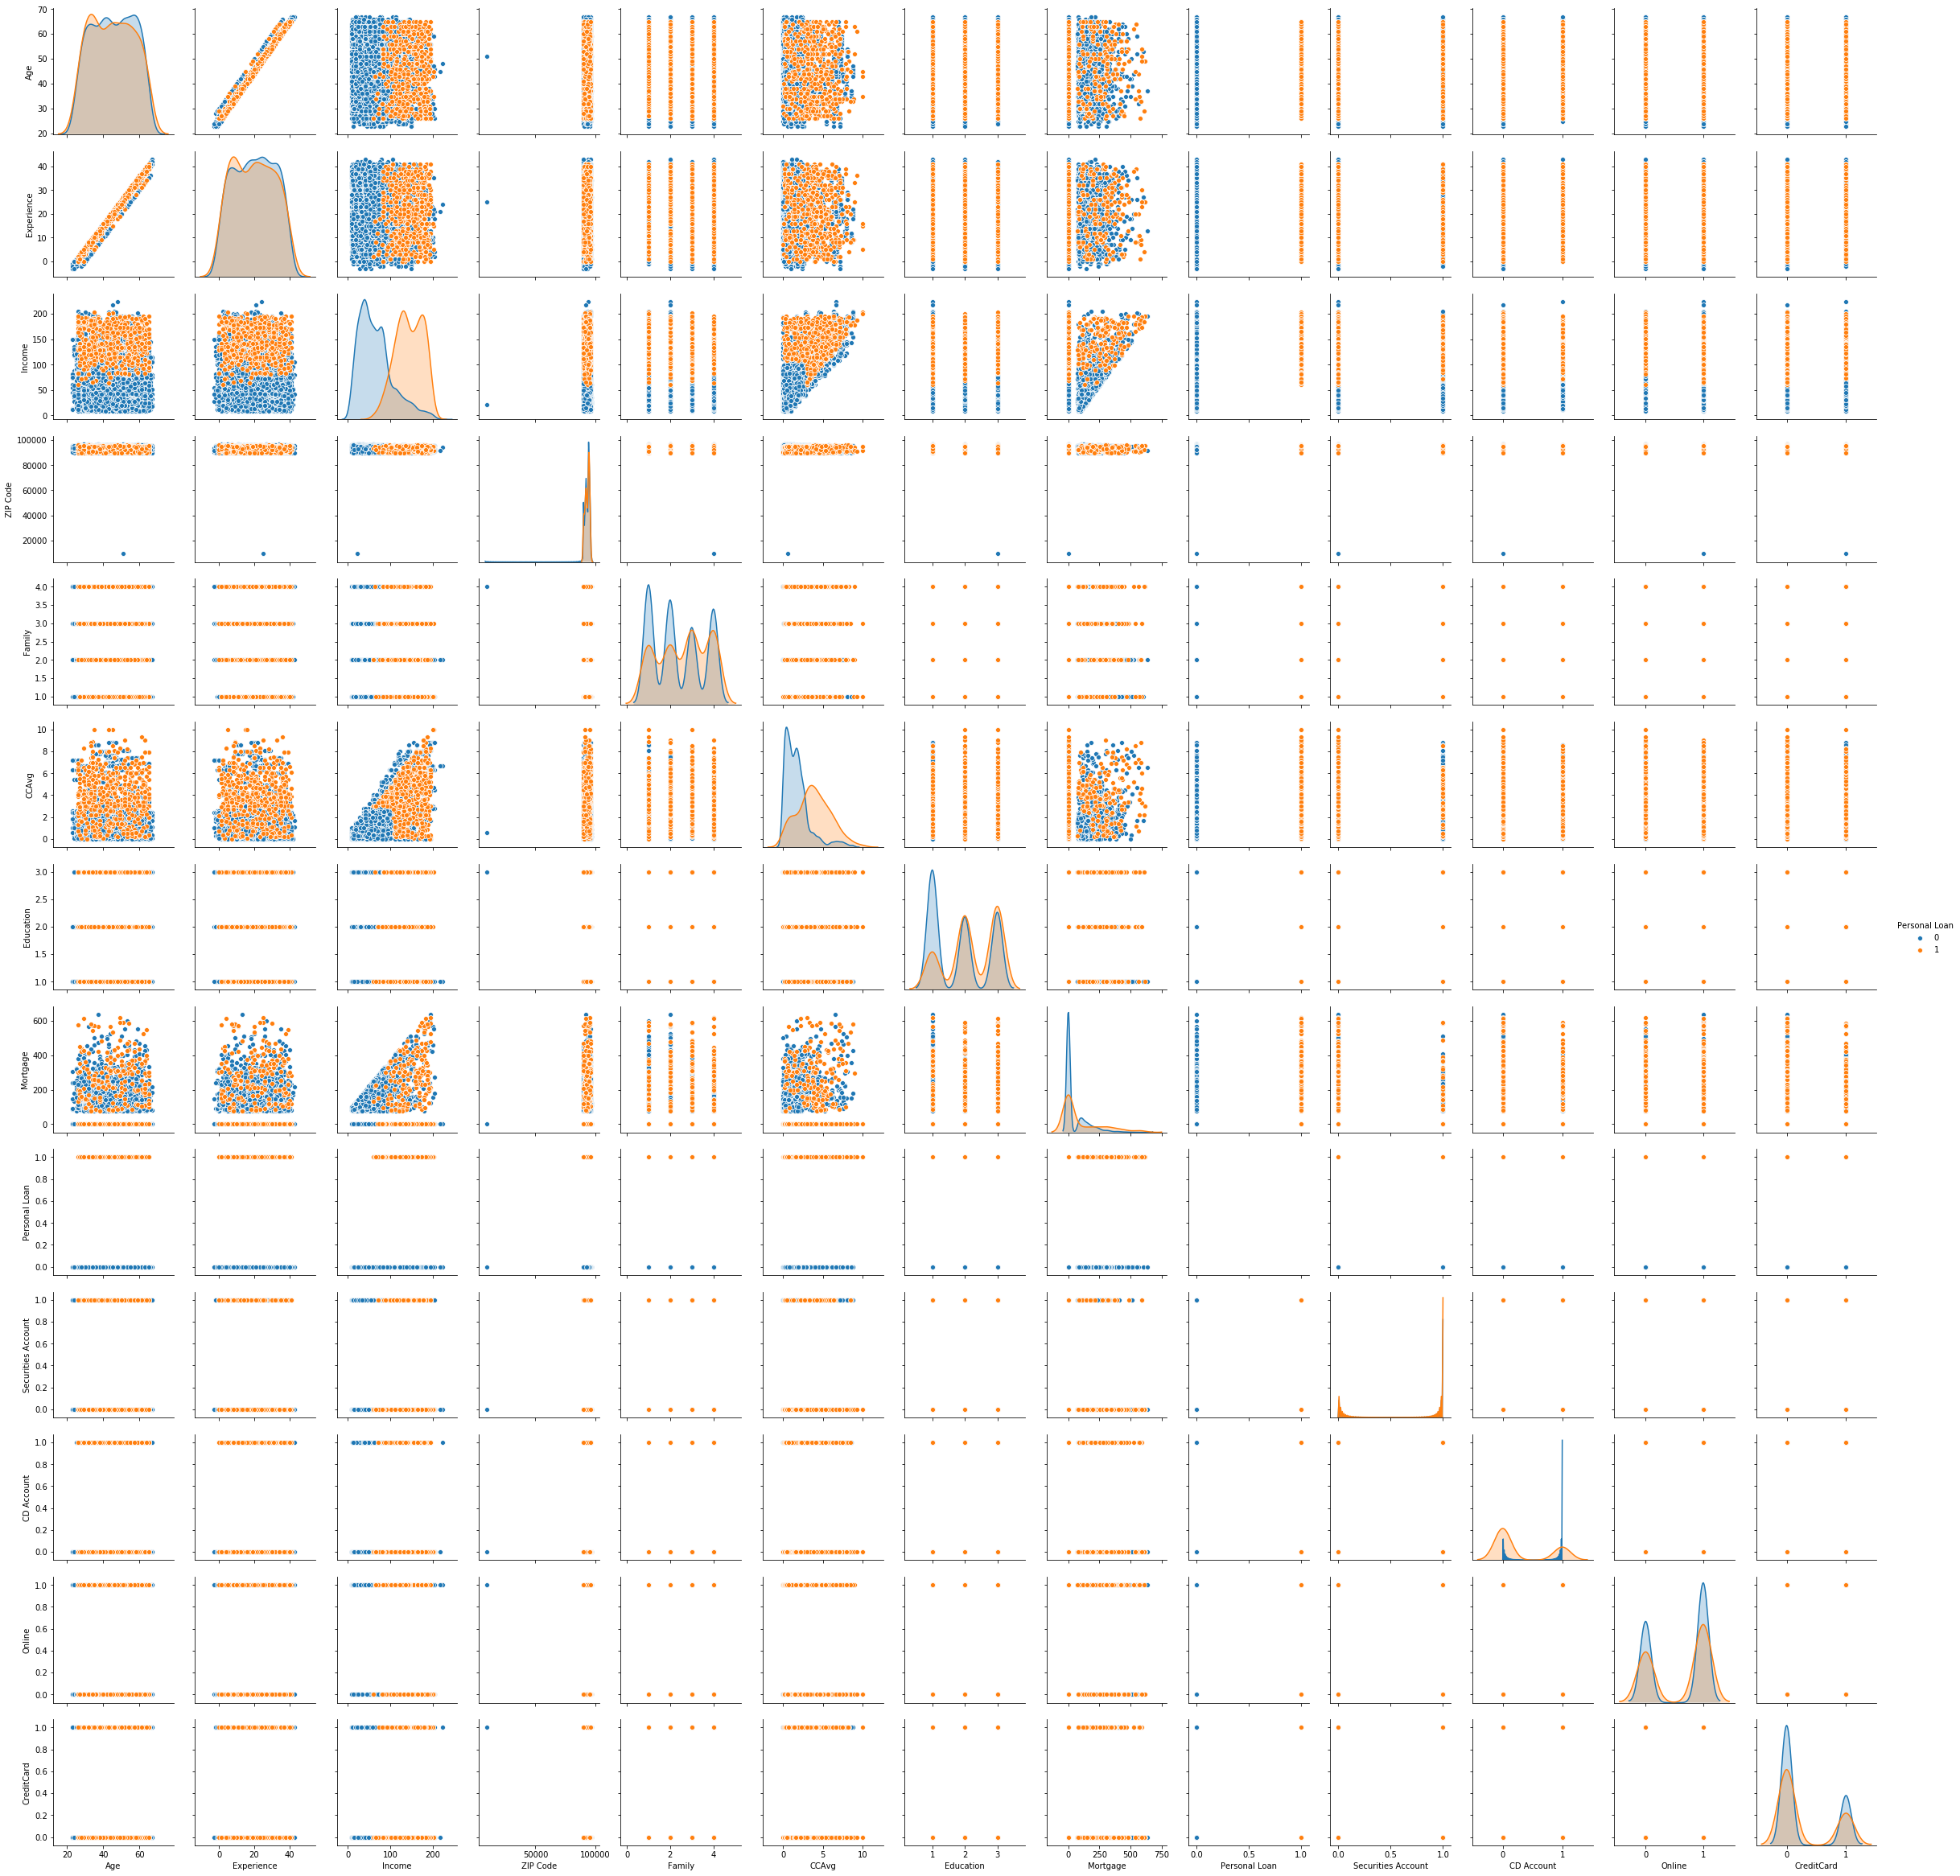

In [30]:
sns.pairplot(data,diag_kind='kde',hue='Personal Loan')

In [32]:
#five point summary
data.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


In [33]:
#We see -3 as experience, need to inspect these values.
data[data['Experience']<0].shape
#Taking absolute value of Experience column, to remove negative values
data['Experience']=abs(data['Experience'])
data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

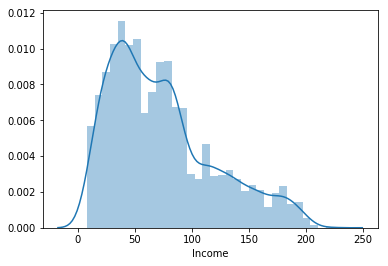

In [34]:
#income values are skewed
sns.distplot(data['Income'],kde=True)

In [35]:
print('Skeweness of income:',stats.skew(data.Income))

('Skeweness of income:', 0.8410861846424931)


In [36]:
#mortage column is ignored as most of the data are zeros
#Zipcode is ignored


In [37]:
#Income, it shows variation to those who took personal loan and those who do not. 
print(pd.pivot_table(data=data,index='Personal Loan',values='Income',aggfunc=['mean','median']))


                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [38]:
#CCAvg, CCAvg spend is higher incase of personal Loan takers.
print(pd.pivot_table(data=data,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))

                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.729009    1.4
1              3.905354    3.8


In [39]:
#Mortgage
print(pd.pivot_table(data=data,index='Personal Loan',values='Mortgage',aggfunc=['mean','max']))

                     mean      max
                 Mortgage Mortgage
Personal Loan                     
0               51.789381      635
1              100.845833      617


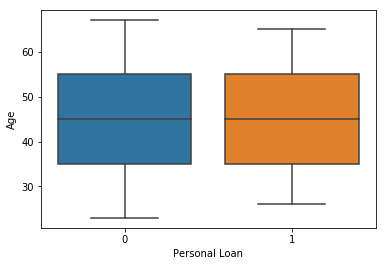

In [40]:
sns.boxplot(x='Personal Loan',y='Age',data=data)

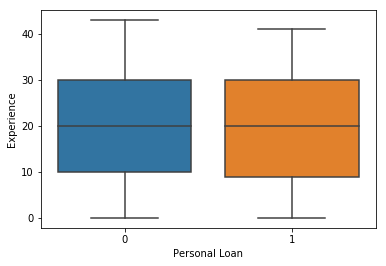

In [41]:
sns.boxplot(x='Personal Loan',y='Experience',data=data)

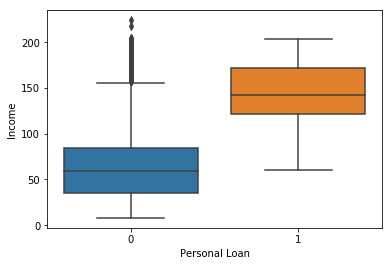

In [42]:
sns.boxplot(x='Personal Loan',y='Income',data=data)

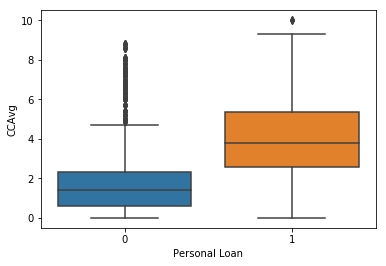

In [43]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=data)

In [44]:
#Creating family dummy Variables
fa = pd.get_dummies(data['Family'], prefix='Family')
#Adding the results to the master dataframe
data1 = pd.concat([data,fa], axis=1)

In [45]:
#Creating education dummy Variables
ed = pd.get_dummies(data['Education'], prefix='Education')
#Adding the results to the master dataframe
data1 = pd.concat([data1,ed], axis=1)

In [46]:
#created dummies for the below variables, so we can drop them
#data2 is our new dataset after cleaning and transformation
data2=data1.drop(['Education','Family'],1)

In [47]:
var=['Securities Account','CD Account','Online','CreditCard']
data2[var]=data2[var].astype('int64')

In [48]:
data2_X = data2.drop(['Personal Loan'], axis=1)
X = data2.drop(['Personal Loan'], axis=1)
y = data2['Personal Loan']

In [49]:
X.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [50]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2_X, y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler

In [52]:
#Applying Scaling to training set
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

C:\Users\asus\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\asus\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asus\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [111]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.106272
         Iterations 10


In [55]:
#dropping Family_2 and Education_1 in iteration 2 as they have high p value
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1)

In [56]:
logit_model=sm.Logit(y_train,X_train1)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              786.0626   
Date:                2020-04-26 12:04 BIC:              878.4704   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            14               LL-Null:          -1075.0    
Df Residuals:        3485             LLR p-value:      3.3044e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0389   0.8931  -0.0436 0.9652 -1.7894  1.7115
Experience          0.2218   0.8877   0.

In [57]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,86.346397
1,Experience,86.219265
3,ZIP Code,7.860270
8,Online,2.611990
10,Family_1,2.115408
12,Family_4,2.051043
14,Education_3,1.901182
11,Family_3,1.883854
2,Income,1.875980
13,Education_2,1.794002


In [59]:
#dropping Age as it high VIF value and its very strongly correlated to experience in correlation matrix
X_train1 = X_train.drop(['Family_2','Education_1','Age'],axis=1)

In [60]:
logit_model=sm.Logit(y_train,X_train1)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              784.0646   
Date:                2020-04-26 12:06 BIC:              870.3118   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            13               LL-Null:          -1075.0    
Df Residuals:        3486             LLR p-value:      3.1311e-290
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1834   0.0966   1.8989 0.0576 -0.0059  0.3726
Income              3.0115   0.1795  16.

In [61]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.754308
7,Online,2.611988
9,Family_1,2.115120
11,Family_4,2.050384
10,Family_3,1.874857
1,Income,1.874181
13,Education_3,1.784748
12,Education_2,1.773760
3,CCAvg,1.746099
8,CreditCard,1.578629


In [62]:
#dropping Mortgage as it high p value
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage'],axis=1)

In [63]:
logit_model=sm.Logit(y_train,X_train1)
result4=logit_model.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.108273
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.647      
Dependent Variable:  Personal Loan    AIC:              783.9101   
Date:                2020-04-26 12:08 BIC:              863.9969   
No. Observations:    3500             Log-Likelihood:   -378.96    
Df Model:            12               LL-Null:          -1075.0    
Df Residuals:        3487             LLR p-value:      7.1073e-291
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1793   0.0964   1.8593 0.0630 -0.0097  0.3682
Income              3.0247   0.1792  16.8

In [64]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.393241
6,Online,2.611935
8,Family_1,2.115080
10,Family_4,2.050379
9,Family_3,1.874853
1,Income,1.833345
12,Education_3,1.784571
11,Education_2,1.773297
3,CCAvg,1.744645
7,CreditCard,1.578105


In [65]:
#dropping ZIP code as it has high VIF
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code'],axis=1)
#                         'CCAvg',], axis=1)

#ITERATION 5
logit_model=sm.Logit(y_train,X_train1)
result5=logit_model.fit()
print(result5.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239325
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1699.2744 
Date:                 2020-04-26 12:09 BIC:              1773.2007 
No. Observations:     3500             Log-Likelihood:   -837.64   
Df Model:             11               LL-Null:          -1075.0   
Df Residuals:         3488             LLR p-value:      7.8786e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1087   0.0634   1.7159 0.0862 -0.0155  0.2329
Income              1.2631   0.0811  15.5

,Features,VIF
5,Online,2.038095
1,Income,1.809262
2,CCAvg,1.741828
10,Education_2,1.591837
9,Family_4,1.591353
7,Family_1,1.539533
11,Education_3,1.535503
8,Family_3,1.456251
6,CreditCard,1.427333
4,CD Account,1.358701


In [66]:
#dropping CCAvg as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg'],axis=1)

#ITERATION 6
logit_model=sm.Logit(y_train,X_train1)
result6=logit_model.fit()
print(result6.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239336
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1697.3486 
Date:                 2020-04-26 12:10 BIC:              1765.1143 
No. Observations:     3500             Log-Likelihood:   -837.67   
Df Model:             10               LL-Null:          -1075.0   
Df Residuals:         3489             LLR p-value:      1.1543e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1081   0.0633   1.7071 0.0878 -0.0160  0.2321
Income              1.2754   0.0673  18.9

,Features,VIF
4,Online,2.037673
9,Education_2,1.591769
8,Family_4,1.591347
6,Family_1,1.538931
10,Education_3,1.535502
7,Family_3,1.455713
5,CreditCard,1.427284
3,CD Account,1.357851
2,Securities Account,1.235560
1,Income,1.086861


In [67]:
#dropping Education_2  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        ],
                        axis=1)

#ITERATION 7
logit_model=sm.Logit(y_train,X_train1)
result7=logit_model.fit()
print(result7.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239486
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.220     
Dependent Variable:   Personal Loan    AIC:              1696.4051 
Date:                 2020-04-26 12:11 BIC:              1758.0103 
No. Observations:     3500             Log-Likelihood:   -838.20   
Df Model:             9                LL-Null:          -1075.0   
Df Residuals:         3490             LLR p-value:      2.5961e-96
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6886 0.0913 -0.0172  0.2309
Income              1.2680   0.0668  18.9

,Features,VIF
4,Online,1.971047
6,Family_1,1.451326
8,Family_4,1.439958
5,CreditCard,1.421123
3,CD Account,1.357842
9,Education_3,1.343243
7,Family_3,1.311620
2,Securities Account,1.232961
1,Income,1.073320
0,Experience,1.007918


In [68]:
#dropping Education_3  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3'],axis=1)

#ITERATION 8
logit_model=sm.Logit(y_train,X_train1)
result8=logit_model.fit()
print(result8.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239772
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.219     
Dependent Variable:   Personal Loan    AIC:              1696.4016 
Date:                 2020-04-26 12:11 BIC:              1751.8463 
No. Observations:     3500             Log-Likelihood:   -839.20   
Df Model:             8                LL-Null:          -1075.0   
Df Residuals:         3491             LLR p-value:      8.7449e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6879 0.0914 -0.0172  0.2308
Income              1.2587   0.0663  18.9

,Features,VIF
4,Online,1.939247
5,CreditCard,1.415223
8,Family_4,1.392380
6,Family_1,1.378565
3,CD Account,1.357642
7,Family_3,1.283224
2,Securities Account,1.231932
1,Income,1.066492
0,Experience,1.007910


In [69]:
#dropping Experience as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)

#ITERATION 9
logit_model=sm.Logit(y_train,X_train1)
result9=logit_model.fit()
print(result9.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.240180
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.218     
Dependent Variable:   Personal Loan    AIC:              1697.2579 
Date:                 2020-04-26 12:12 BIC:              1746.5421 
No. Observations:     3500             Log-Likelihood:   -840.63   
Df Model:             7                LL-Null:          -1075.0   
Df Residuals:         3492             LLR p-value:      4.2152e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              1.2499   0.0659  18.9748 0.0000  1.1208  1.3790
Securities Account -1.7785   0.2647  -6.7

,Features,VIF
3,Online,1.937290
4,CreditCard,1.415162
7,Family_4,1.386993
5,Family_1,1.378484
2,CD Account,1.357436
6,Family_3,1.283208
1,Securities Account,1.231717
0,Income,1.062961


In [70]:
#All the features are significant and VIF is also fine. 
#Selecting these variables to predict the result

In [71]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

C:\Users\asus\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
#Fitting the model on test data
X_test1 = X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
X_test1.columns

Index([u'Income', u'Securities Account', u'CD Account', u'Online',
       u'CreditCard', u'Family_1', u'Family_3', u'Family_4'],
      dtype='object')

In [73]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [74]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1317   25]
 [  81   77]]


In [75]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=77
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1317
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=25
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=81


In [76]:
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 92.93%
Misclassification Rate: It is often wrong: 7.07%
Sensitivity: When its actually yes how often it predicts yes: 48.73%
Specificity: When its actually no, how often does it predict no: 98.14%
Precision: When it predicts yes, how often is it correct: 75.49%


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1342
           1       0.75      0.49      0.59       158

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.85      0.73      0.78      1500
weighted avg       0.92      0.93      0.92      1500



In [78]:
#Sensitivity value is too low, this may be due to data we have. Which contains only 480 records which are 
#yes it seems model needs more data to train itself.

#Specificity seems fine

#Trying new model K nearest neighbour to check if we could improve the results.

#More the area under ROC better the model performs, its 0.73 in this case. Model is ok be lets see if this could be 
#improved further specially Sesitivity

KNN for classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
#Using X_train dataframe as it was final data after cleaning, apply scaling and splitting
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [92]:
#For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)

In [91]:
NNH.score(X_test, y_test)

0.894

In [90]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1324   18]
 [  68   90]]


In [89]:
#Iteration 1:Using same features as derived in above Logistic model, we perofrmance getting improved
X_KNN_train1 = X_train.drop(['Age'],axis=1)
#                         'ZIP Code','CCAvg','Family_2','Education_1','Age','Mortgage'], axis=1)

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH1.fit(X_train1, y_train)

X_KNN_test1 = X_test.drop(['Age'],axis=1)
predicted_labels_KNN = NNH1.predict(X_test1)

NNH1.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1324   18]
 [  68   90]]


In [96]:
#CALCULATING METRICES FOR CHECKING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=90
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1324
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=18
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=68


In [86]:
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 94.27%
Misclassification Rate: It is often wrong: 5.73%
Sensitivity: When its actually yes how often it predicts yes: 56.96%
Specificity: When its actually no, how often does it predict no: 98.66%
Precision: When it predicts yes, how often is it correct: 83.33%


In [97]:
#Iteration 2:Using same features as derived in above Logistic model, however taking neighbours as 9

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH2 = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform' )
NNH2.fit(X_train1, y_train)

predicted_labels_KNN = NNH2.predict(X_test1)

NNH2.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1330   12]
 [  66   92]]


In [98]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=92
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1330
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=12
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=66

In [100]:
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 94.80%
Misclassification Rate: It is often wrong: 5.20%
Sensitivity: When its actually yes how often it predicts yes: 58.23%
Specificity: When its actually no, how often does it predict no: 99.11%
Precision: When it predicts yes, how often is it correct: 88.46%


In [101]:
#Model has improved with KNN and n_neighbours as 9, also ROC and AUC have improved

Applying Gaussian Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
#Iteration 1 - Fitting all variables, cleaned and normalized data
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

[[1253   89]
 [  56  102]]


In [104]:
#CALCULATING METRICES FOR CHECKING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=102
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1253
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=89
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=56

In [105]:
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 90.33%
Misclassification Rate: It is often wrong: 9.67%
Sensitivity: When its actually yes how often it predicts yes: 64.56%
Specificity: When its actually no, how often does it predict no: 93.37%
Precision: When it predicts yes, how often is it correct: 53.40%


In [107]:
#Iteration 2 - Dropping all variables as found in Logistic Regression
X_train1=X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],1)
X_test1= X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],axis=1)

GNB2 = GaussianNB()
GNB2.fit(X_train1, y_train)
predicted_labels_GNB = GNB2.predict(X_test1)

GNB2.score(X_test1, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

#CALCULATING METRICES FOR CHECKING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=72
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1270
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=72
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=86

[[1270   72]
 [  86   72]]


In [108]:
Accuracy=float((TP+TN))/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=float((FP+FN))/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=float(TP)/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=float(TN)/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=float(TP)/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 89.47%
Misclassification Rate: It is often wrong: 10.53%
Sensitivity: When its actually yes how often it predicts yes: 45.57%
Specificity: When its actually no, how often does it predict no: 94.63%
Precision: When it predicts yes, how often is it correct: 50.00%


In [109]:
#KNN model performs the best, evident from above results. 
#However, Sensitivity is greater in GNB.
#The yes prediction is on lower side as data is not balanced. 
#Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those 
#predicted as yes first, it is 88% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 58% still we end up offering more loans at end of program

In [110]:
 
#Further to this we can apply technique like random forest,
#decesion trees etc and use regularization and then compare the results to see if model improves further.